In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# campos do df: cnpj_cpf tipo_pessoa nome  valor_titulo  taxa_cessao  vencimento  dias_ate_venc  valor_aquisicao  uf
# gerando dataframe com as informacoes extraidas
df = pd.read_csv('infos_extraidas.csv')

# removendo aspas desnecessarias
df['cnpj_cpf'] = df['cnpj_cpf'].astype(str).str.strip("'")

In [3]:
print(df.cnpj_cpf.head())

0    10161543989663
1    25385033347321
2    19075432891605
3    00074218309280
4    81536337073518
Name: cnpj_cpf, dtype: object


## Calculando o Valor Total de Aquisição da Cessão 

In [4]:
print(df.head())

         cnpj_cpf tipo_pessoa                           nome  valor_titulo  \
0  10161543989663          PJ   PlanaltoAgroEnergia Solucoes     880119.39   
1  25385033347321          PJ   AgroGrowthVerde Agropecuaria     720141.07   
2  19075432891605          PJ     AgriAgri Gestao Rural S.A.     669247.60   
3  00074218309280          PJ  AgriNovaAgroDynamic Exportaca     438057.64   
4  81536337073518          PJ  AgroMasterAgroBio Empreendime     406004.54   

   taxa_cessao  vencimento  dias_ate_venc  valor_aquisicao  uf  
0       27.001  2026-04-02            356     32617.280880  GO  
1       27.000  2025-12-08            241     77379.456563  SP  
2       27.001  2025-10-30            202    103171.957019  RS  
3       27.001  2026-06-18            433      7959.816991  MS  
4       27.000  2027-02-06            666       853.667076  MT  


In [5]:
# calculando valor total de aquisicao da cessao 
VAL_TOTOAL = df['valor_aquisicao'].sum()
print(VAL_TOTOAL)

6472369.853313945


## Soma do Valor de Face dos 5 sacados com maior Volume 

In [6]:
# dividindo os grupos
grupos = df.groupby('cnpj_cpf')

In [7]:
df_volume_faces = df.drop_duplicates(subset='cnpj_cpf')[['cnpj_cpf', 'tipo_pessoa', 'uf', 'nome']]

# Zera os valores
df_volume_faces['volume_faces'] = 0

# definindo o tipo certo para a coluna
df_volume_faces['volume_faces'] = df_volume_faces['volume_faces'].astype('float')

# Garante que os nomes de colunas estão limpos
df_volume_faces.columns = df_volume_faces.columns.str.strip()

In [8]:
print(df_volume_faces.head())

         cnpj_cpf tipo_pessoa  uf                           nome  volume_faces
0  10161543989663          PJ  GO   PlanaltoAgroEnergia Solucoes           0.0
1  25385033347321          PJ  SP   AgroGrowthVerde Agropecuaria           0.0
2  19075432891605          PJ  RS     AgriAgri Gestao Rural S.A.           0.0
3  00074218309280          PJ  MS  AgriNovaAgroDynamic Exportaca           0.0
4  81536337073518          PJ  MT  AgroMasterAgroBio Empreendime           0.0


In [9]:

# verificando os tipo
print(df_volume_faces.cnpj_cpf.head())
print(df_volume_faces.volume_faces.head())

0    10161543989663
1    25385033347321
2    19075432891605
3    00074218309280
4    81536337073518
Name: cnpj_cpf, dtype: object
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: volume_faces, dtype: float64


In [10]:
# Define o índice como cnpj_cpf - remove essa coluna do df
df_volume_faces.set_index('cnpj_cpf', inplace=True)

In [11]:
print(df_volume_faces.head())

               tipo_pessoa  uf                           nome  volume_faces
cnpj_cpf                                                                   
10161543989663          PJ  GO   PlanaltoAgroEnergia Solucoes           0.0
25385033347321          PJ  SP   AgroGrowthVerde Agropecuaria           0.0
19075432891605          PJ  RS     AgriAgri Gestao Rural S.A.           0.0
00074218309280          PJ  MS  AgriNovaAgroDynamic Exportaca           0.0
81536337073518          PJ  MT  AgroMasterAgroBio Empreendime           0.0


In [12]:
# somando os valores de face de cada grupo(cada cpf/cnpj)
for doc, gp in grupos:
    soma = gp.valor_titulo.sum()
    doc = doc.strip("'")
    print(doc, soma)
    df_volume_faces.loc[doc, 'volume_faces'] = soma
    print(df_volume_faces.loc[doc, 'volume_faces'])
    print()

00000368738171 738575.42
738575.42

00000740851565 323506.85
323506.85

00012427295900 1061032.3599999999
1061032.3599999999

00012475032985 303551.31
303551.31

00016124851949 2728672.42
2728672.42

00017793870927 1786243.1600000001
1786243.1600000001

00020102514836 1091187.83
1091187.83

00029891154879 5523292.97
5523292.97

00033510296761 885715.62
885715.62

00035948838582 1476839.81
1476839.81

00038926328011 613795.68
613795.68

00042409214826 1160283.1
1160283.1

00044439057558 917127.42
917127.42

00048716835616 816409.57
816409.57

00056317523689 276148.84
276148.84

00057000944581 2832721.24
2832721.24

00061258546315 810016.9
810016.9

00061381615968 659412.71
659412.71

00070887415727 245240.02
245240.02

00074218309280 1303157.25
1303157.25

00097390280588 900246.25
900246.25

00578376876194 2130164.99
2130164.99

01061724348829 524367.37
524367.37

01897221085000 1045546.9199999999
1045546.9199999999

04337370325735 435283.86
435283.86

04757455956961 1182709.94
1182709.

In [13]:
print(df_volume_faces.head())

               tipo_pessoa  uf                           nome  volume_faces
cnpj_cpf                                                                   
10161543989663          PJ  GO   PlanaltoAgroEnergia Solucoes    3364647.86
25385033347321          PJ  SP   AgroGrowthVerde Agropecuaria    1868281.86
19075432891605          PJ  RS     AgriAgri Gestao Rural S.A.     861274.88
00074218309280          PJ  MS  AgriNovaAgroDynamic Exportaca    1303157.25
81536337073518          PJ  MT  AgroMasterAgroBio Empreendime     406004.54


In [14]:
# ordenando o df pelo valor da soma dos títulos
TOP5_DEVEDORES = df_volume_faces.sort_values(by='volume_faces', ascending=False)


In [15]:
print(TOP5_DEVEDORES.head())

               tipo_pessoa  uf                           nome  volume_faces
cnpj_cpf                                                                   
19265735948848          PJ  SP  TerraCultivar Solucoes Rurais    5705210.61
00029891154879          PF  PR                   Thiago Rocha    5523292.97
48693012095190          PJ  RS  AgroDigitalAgroLeste Producao    5367193.54
54379517555811          PJ  RS  AgroTransAgrolab Agropecuaria    5283106.58
29688633602077          PJ  RS  AgroFusionAgroPrime Agronegoc    3465093.62


In [16]:
# separando o top5
row_slice = slice(0,5)
TOP5_DEVEDORES = TOP5_DEVEDORES[row_slice]

In [17]:
print(TOP5_DEVEDORES.to_string())

               tipo_pessoa  uf                           nome  volume_faces
cnpj_cpf                                                                   
19265735948848          PJ  SP  TerraCultivar Solucoes Rurais    5705210.61
00029891154879          PF  PR                   Thiago Rocha    5523292.97
48693012095190          PJ  RS  AgroDigitalAgroLeste Producao    5367193.54
54379517555811          PJ  RS  AgroTransAgrolab Agropecuaria    5283106.58
29688633602077          PJ  RS  AgroFusionAgroPrime Agronegoc    3465093.62


In [18]:
TOP5_DEVEDORES.to_clipboard()

## Calculando Numero de Créditos de PJ e PF 

In [19]:
contagens = df['tipo_pessoa'].value_counts(dropna=False)

In [20]:
CREDITOS_PF = int(contagens['PF'])
CREDITOS_PJ = int(contagens['PJ'])

print(CREDITOS_PF, CREDITOS_PJ)

52 247


## Calculando Ticket médio de PF e PJ 

In [21]:
grupos = df.groupby('tipo_pessoa')

In [22]:
numero_titulos_pj = grupos.size()['PJ']
soma_faces_pj = grupos['valor_titulo'].sum()['PJ']

TICKET_MEDIO_PJ = soma_faces_pj/numero_titulos_pj

print(TICKET_MEDIO_PJ)

498529.9743319838


In [23]:
numero_titulos_pf = grupos.size()['PF']
soma_faces_pf = grupos['valor_titulo'].sum()['PF']

TICKET_MEDIO_PF = soma_faces_pj/numero_titulos_pf

print(TICKET_MEDIO_PF)

2368017.378076923


## Calculando Prazo médio de vencimento 

In [24]:
PRAZO_MEDIO_GERAL = df['dias_ate_venc'].mean()
print(PRAZO_MEDIO_GERAL)

426.8595317725752


In [25]:
# Separando os grupos
grupos = df.groupby('tipo_pessoa')

In [26]:
# dados sobre PJ
PRAZO_MEDIO_PJ = grupos.get_group('PJ')['dias_ate_venc'].mean()
print(PRAZO_MEDIO_PJ)


420.08097165991904


In [27]:
# dados sobre PF
PRAZO_MEDIO_PF = grupos.get_group('PF')['dias_ate_venc'].mean()
print(PRAZO_MEDIO_PF)


459.0576923076923


## Plotando um gráfico do valor de aquisição pela data de vencimento dos créditos da cessão 

In [28]:
print(df.count())

cnpj_cpf           299
tipo_pessoa        299
nome               299
valor_titulo       299
taxa_cessao        299
vencimento         299
dias_ate_venc      299
valor_aquisicao    299
uf                 299
dtype: int64


In [29]:
df_agrupado = df.groupby('vencimento')['valor_aquisicao'].sum().reset_index()


In [30]:
print(df_agrupado.sort_values(by='vencimento'))

     vencimento  valor_aquisicao
0    2025-10-06    294513.531219
1    2025-10-08    105026.888517
2    2025-10-09     64699.102349
3    2025-10-10     17686.845878
4    2025-10-14     47066.392548
..          ...              ...
224  2027-02-11       996.075933
225  2027-02-12       928.772095
226  2027-02-14      2617.599869
227  2027-02-15       228.847698
228  2027-02-16       598.300901

[229 rows x 2 columns]


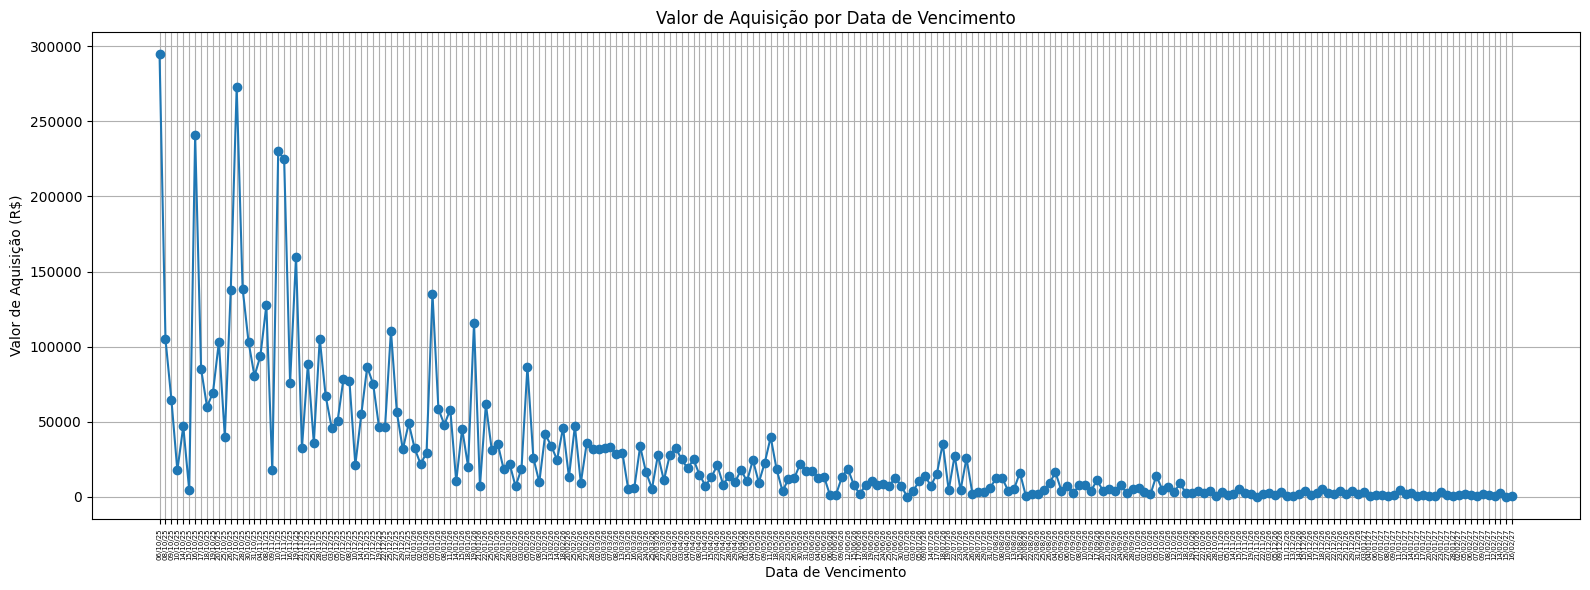

In [31]:
df_agrupado = df.groupby('vencimento')['valor_aquisicao'].sum().reset_index()
df_agrupado = df_agrupado.sort_values('vencimento')
df_agrupado['vencimento'] = pd.to_datetime(df_agrupado['vencimento'])  # se necessário
df_agrupado['vencimento_str'] = df_agrupado['vencimento'].dt.strftime('%d/%m/%y')

plt.figure(figsize=(16, 6))
plt.plot(df_agrupado['vencimento_str'], df_agrupado['valor_aquisicao'], marker='o')
plt.title('Valor de Aquisição por Data de Vencimento')
plt.xlabel('Data de Vencimento')
plt.xticks(fontsize=5)
plt.ylabel('Valor de Aquisição (R$)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
print(df_agrupado.head())

  vencimento  valor_aquisicao vencimento_str
0 2025-10-06    294513.531219       06/10/25
1 2025-10-08    105026.888517       08/10/25
2 2025-10-09     64699.102349       09/10/25
3 2025-10-10     17686.845878       10/10/25
4 2025-10-14     47066.392548       14/10/25


In [33]:
df_agrupado.to_csv('./mapa_interativo/dados_grafico.csv')

## Coletando dados necessários para indicar a dispersão geográfica dos créditos

In [34]:
n_creditos_uf = df.groupby('uf').size()
df_agrupado_uf = df.groupby('uf')[['valor_titulo', 'valor_aquisicao']].sum().reset_index()
df_agrupado_uf.columns = ['uf', 'valor_face', 'valor_aquisicao']
df_agrupado_uf['valor_medio_face'] = df_agrupado_uf['valor_face'] / n_creditos_uf.values
df_agrupado_uf['valor_medio_aquisicao'] = df_agrupado_uf['valor_aquisicao'] / n_creditos_uf.values
df_agrupado_uf = df_agrupado_uf.merge(n_creditos_uf.rename('n_creditos'), on='uf')




In [35]:
print(df_agrupado_uf.to_string())

   uf   valor_face  valor_aquisicao  valor_medio_face  valor_medio_aquisicao  n_creditos
0  GO  24633137.84     1.068261e+06     464776.185660           20155.866749          53
1  MS  21848314.74     9.011853e+05     508100.342791           20957.797681          43
2  MT  24741461.04     1.190595e+06     466820.019623           22464.050137          53
3  PR  23400130.11     1.057478e+06     487502.710625           22030.781637          48
4  RS  27189594.72     1.119249e+06     554889.688163           22841.808149          49
5  SP  26474284.69     1.135603e+06     499514.805472           21426.468683          53


In [36]:
extremos = df.groupby('uf')[['valor_titulo', 'valor_aquisicao']].agg(['max', 'min']).reset_index()
extremos.columns = ['uf', 
                    'valor_face_max', 'valor_face_min', 
                    'valor_aquisicao_max', 'valor_aquisicao_min']

print(extremos)


   uf  valor_face_max  valor_face_min  valor_aquisicao_max  \
0  GO       902886.86          917.15        102608.453803   
1  MS      1200049.98        69118.11        105026.888517   
2  MT       905163.29        63672.51        122916.275419   
3  PR      1127817.30        70589.67        196138.654534   
4  RS      1221803.29        25797.79        132323.850494   
5  SP       940205.99        28482.22        137780.950847   

   valor_aquisicao_min  
0            14.776527  
1           625.712606  
2           623.452494  
3           270.386911  
4           514.180189  
5           122.134153  


In [37]:
df_agrupado_uf = df_agrupado_uf.merge(extremos, on='uf')

In [38]:
print(df_agrupado_uf.to_string())

   uf   valor_face  valor_aquisicao  valor_medio_face  valor_medio_aquisicao  n_creditos  valor_face_max  valor_face_min  valor_aquisicao_max  valor_aquisicao_min
0  GO  24633137.84     1.068261e+06     464776.185660           20155.866749          53       902886.86          917.15        102608.453803            14.776527
1  MS  21848314.74     9.011853e+05     508100.342791           20957.797681          43      1200049.98        69118.11        105026.888517           625.712606
2  MT  24741461.04     1.190595e+06     466820.019623           22464.050137          53       905163.29        63672.51        122916.275419           623.452494
3  PR  23400130.11     1.057478e+06     487502.710625           22030.781637          48      1127817.30        70589.67        196138.654534           270.386911
4  RS  27189594.72     1.119249e+06     554889.688163           22841.808149          49      1221803.29        25797.79        132323.850494           514.180189
5  SP  26474284.69    

In [40]:
df_agrupado_uf.to_csv('./mapa_interativo/dados_mapa_clean.csv')